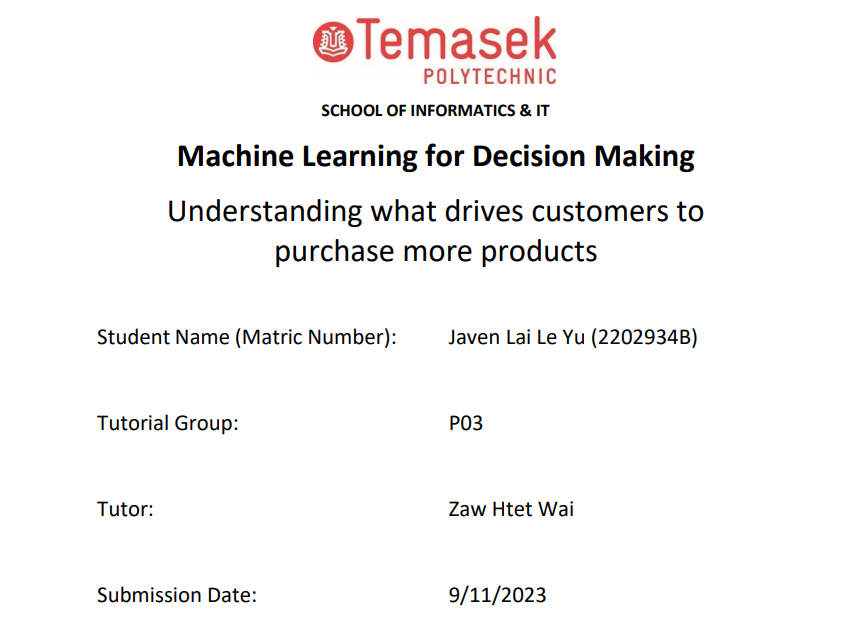
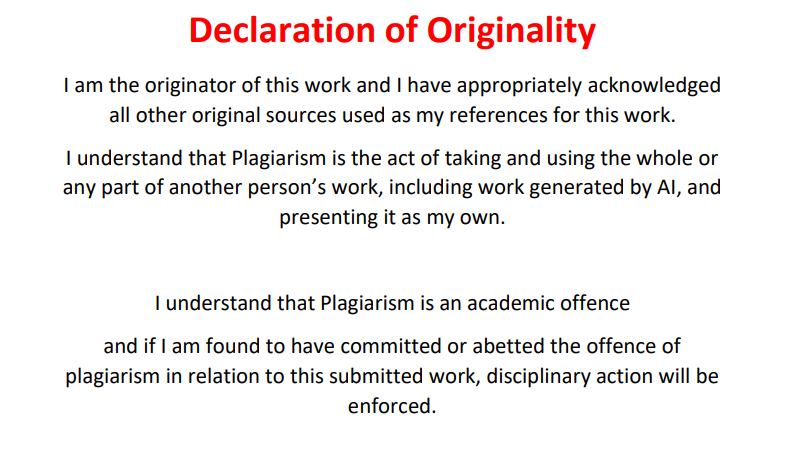
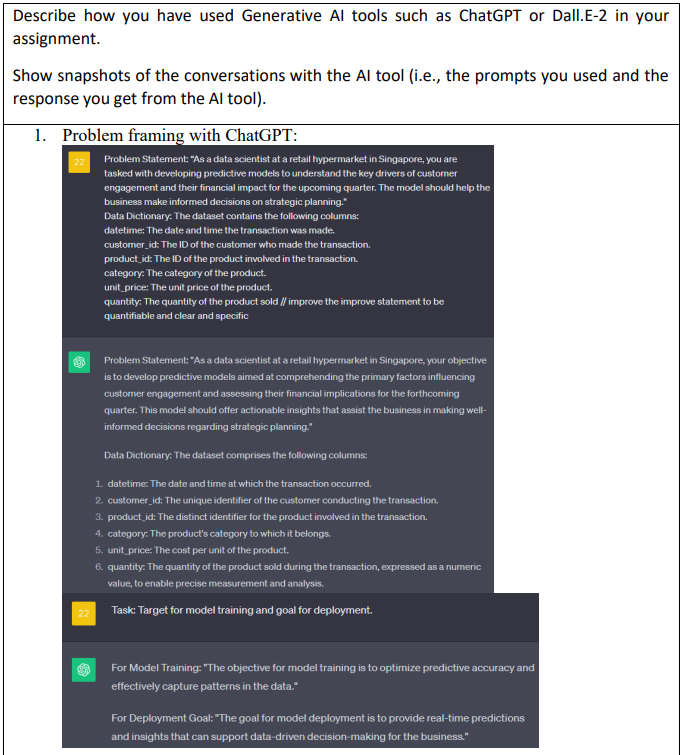
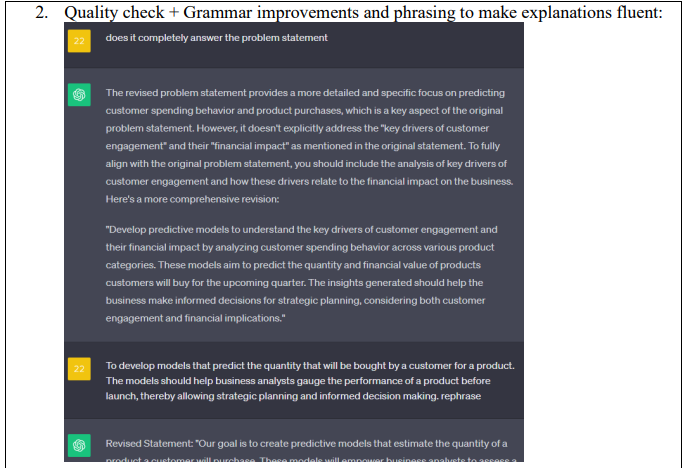
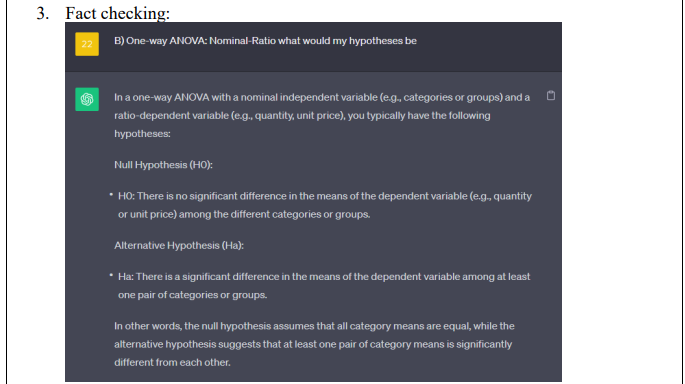
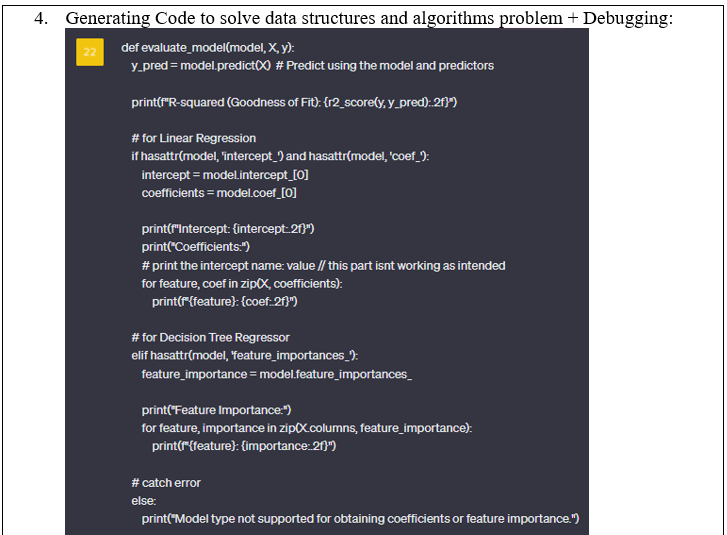
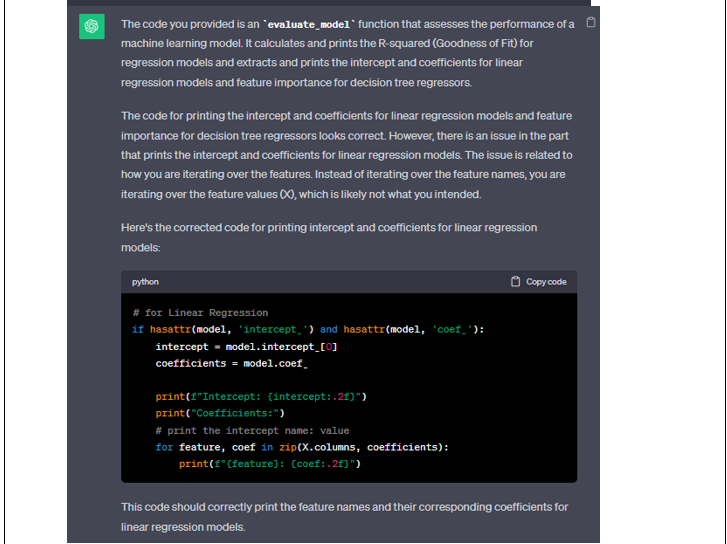
#### All retrievable conversations with ChatGPT:
- https://chat.openai.com/share/58efbc54-0d00-4289-998c-c3185769274c
- https://chat.openai.com/share/eac1cc39-e944-4509-9d54-e08c52ca58b7 
- https://chat.openai.com/share/6aa8965f-4bbc-4cc2-8abf-5d1603f324c2 
- https://chat.openai.com/share/cf90d57b-8425-4502-a871-71a0a8c3d06e 

## 1. Introduction

### Business Context and Requirement
Retail Hypermarket is a Singapore-based retail hypermarket that wants to foster strong customer relationships to ensure its long-term success and engaged me as a data scientist to uncover the key factors that drives customer engagement at Retail Hypermarket. They are also planning to launch a sales campaign starting next month and require sales strategies that can be data-backed to be effective.

### 1.1 Problem Statement
"Develop predictive models to understand the key drivers of customer engagement and their financial impact for the upcoming quarter. The model should help the business make informed decisions on strategic planning."

### 1.2 Objective
I will gauge "customer engagement" by evaluating the extent of a customer's product purchases. Hence, how much products a customer purchases shall represent their engagement.

To develop machine learning models that enables my client understand how factors such as product type, pricing, and market trends influence the quantity of products a customer purchases. My client can leverage the insights gained from the model's predictions to formulate data-driven sales strategies that can increase customer spending, proven by historical data. The strategies are to be deployed in the upcoming quarter with the intention to facilitate a sales campaign that should increase customer engagement by getting customers to buy more products and sales revenue.

The models will be trained to **predict how many products a customer bought (Quantity) for a transaction** based on features related to the product, market trends, and customer behavior.

### 1.3 Goal for deployment
1.3.1 Whitebox:
- Highly interpretable
- Rationale behind how the model derives a prediction can be clearly understood.

1.3.2 Blackbox:
- Predictions are highly accurate.
- Rationale behind how the model derives its prediction can be understood.

### 1.4 Inputs for Models
Target: Quantity

Potential predictors:
- Product type: Certain are meant for bulk purchases by nature. Example: Stationeries like pen, pencil, and eraser.
- Product pricing: Unaffordable to buy multiple expensive products at once.
- Quarter: To capture market trend for different quarters of the year.
- Customer type: Different customer types could have different behavioral patterns.

### 1.5 Considerations
- Predictors should be readily available before occurrence of prediction to ensure model is usable for predicting.
- Data used to train models should be recent, to ensure the patterns and intricacies the model works on matches the current trend. This makes the model usable as the predictions are reliable.
- Models should be well-generalized to predict unseen future occurrences with similar accuracy as training dataset; no overfitting on training data.
- Models should adhere to AI ethics and regulations, ensuring transparency, fairness, absence of bias, and non-discrimination.

### 1.6 Metrics for Model Evaluation
1.6.1 **Goodness of Fit: R^2** to analyse how well to predictions can be explained by the predictor values, to assess if the patterns and intricacies of how customers engage in purchase of various products has been captured by model.

1.6.2 **Accuracy: Mean Absolute Error (MAE)** to assess the error of an average prediction; how far an average prediction deviates from the actual value.
> Root Mean Squared Error (RMSE) is not chosen due to its slightly complex interpretation and nature of amplifying small errors due to the squared term. As the quantity range is quite small ranging from 1 to 20, there is no need to penalize larger errors as there outliers are an impossibility.

### 1.7 Success Criteria for Project
- Deploy **1** predictive model to be presented to Retail Hypermarket for usage.
- Before deployment, a model's MAE should be 2 or below to ensure highly accurate predictions with an average deviation from the truth of no more than 2 units.
> MAE of 0 is the best-case scenario. However, this may not be realistically achievable. MAE of 0 may also indicate overfitting and should checked and confirmed that the model is not overfitted before deployment.
<br>
> A large MAE makes the model unreliable for predicting customer product purchases, casting doubt on the accuracy of the insights derived from the model.
    
- Model fit (R-Squared value) should be above 80%, to affirm model is explainable and its decisions are closely based off truth of historical data; no underfitting, hence reliable.
- Goal of deployment (1.3) should be fulfilled.
- The black-box model should outperform the white-box model by a noticeable margin of minimally 5% if chosen for deployment, to ensure the choice of the more complex model is justified by significantly improved accuracy.

### 1.8 Environment
- New Products:
I should refrain from adding precise details about a product, such a Product ID, to allow the models to forecast engagement on new products that exihibit similar qualities with existing products within the training dataset. For example, the new product is in an existing category. If the new product is in a newly created category not in training dataset, the model cannot be used for predicting customer engagement on that product. This ensures the usability of a model is sustainable for future usage and does not require frequent updates.

- New Customers:
The models should able to predict the customer engagement for customer not within training dataset. This ensures the models are versatile and usable in real world scenario. 
> This means I cannot use features that specify the exact customer. For example, name or customer ID. This is also to avoid overfitting.

- Economic Status:
Customer interests and spending behaviour may change during recessions or economic boom. These trends may not be captured and identified if they are not within the training dataset.

- Market Trends:
The market trend and customers' spending behavior can change rapidly in this fast-paced society, and may differ from the training data.

- Seasonal changes:
Unprecedented events like a virus outbreak, unexpected intense rainfall or scorching weather period, may deter customers from visiting Retail Hypermarket, resulting financial performance that cannot be explained by the models.

- Competition:
New retail companies may emerge in the future and influence customers' decision on whether to patronize Retail Hypermarket, and the models are unable to account for such external factors.

#### In summary:
1. The training dataset must be recent and reflective of current trends and customer behaviour.
2. The Model's code and documentations should be clear, easy to understand, and adaptable for future modifications (e.g. changing dataset, random_state).

### 1.9 Target leakage
#### Do not include:
- **Features not available at the time of prediction** as this makes the model unusable as the business would not have access to such information when making pricing decisions. E.g. Year.
- **Features directly related unit price** to prevent multicollinearity issues.
- **Features with unrealistically high collinearity with unit price**, which could be derived from the target and bias the model.
- **High cardinality columns** like ID to prevent overfitting and ensure model generalization with new, unseen data.
- **Multicollinearity should be avoided** as it leads to reduced model interpretability, unstable coefficient estimates, increased standard errors, misleading feature importance, and difficulty in identifying the true drivers of a prediction.

## 2. Data Attributes

### 2.1 Data Understanding
The dataset 'synthetic_data.csv' was provided by Retail Hypermarket, which contains the company's transaction records from 2022 onwards. A data dictionary, attached below, has also been provided for understanding what each column represents.

> 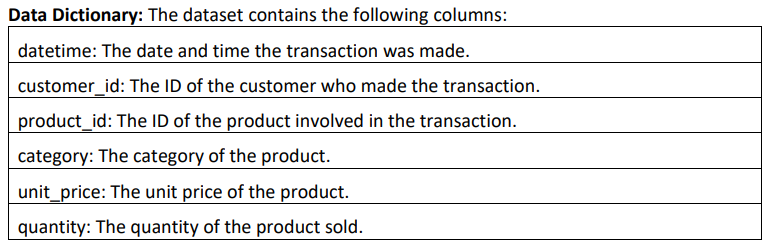

### 2.2 Data Inspection
#### 2.2.1 Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 2202934 # admin number for random_state

#### 2.2.2 Loading csv into DataFrame

In [2]:
df = pd.read_csv('synthetic_data.csv')
print("Number of observations: ", len(df)) # count rows in df

Number of observations:  331664


There is sufficient data of 300K+ rows for train test splitting.

#### 2.2.3 Exploring Dataset

In [3]:
pd.set_option('display.float_format', '{:.10f}'.format) # show full unit_price without truncation
df.head()

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID
0,2022-01-07,10106959,Stationery,9,1.5798753892,a225207859
1,2022-01-09,90097406,Sports,4,196.2533774599,a225207859
2,2022-01-10,10010465,Electronics,1,825.3742907058,a225207859
3,2022-01-14,10010510,Electronics,2,325.9650346646,a225207859
4,2022-01-16,40049430,Books,1,22.6019194627,a225207859


In [4]:
df.tail()

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID
331659,2022-12-18,20026116,Groceries,5,5.3781616834,c891387366
331660,2022-12-23,10018925,Electronics,1,1193.8285186999,c891387366
331661,2022-12-27,20022820,Groceries,3,5.1754917125,c891387366
331662,2022-12-27,40042985,Books,2,38.5985362367,c891387366
331663,2022-12-31,20025163,Groceries,3,5.3977440791,c891387366


#### Evaluation:
1. **Datetime is missing time**. There is nothing that can be done about missing time as I am only provided with this dataset.


2. There is **no columns like Quarter or Month**. However, these seasonality features can be derived from the date in Datetime.


3. Unit_Price is a non-terminating number, which is strange as its unconventional for prices at supermarkets to go beyond cents. Hence, **Unit_Price should be rounded off to 2 d.p.**


4. The records seem to be in **time-series**, and ends at 31 December 2022? (Continued at 2.3.2.b)

#### 2.2.4 Are there duplicated records?

In [5]:
df.duplicated(subset=['Datetime', 'Customer_ID']).sum() # sum up number of duplicated rows

29362

This indicates that **there are customers who make multiple transactions a day**,  indicating that they bought different products at the same time. 

To check if there are duplicated records, I should factor in Product_ID as Retail Hypermarket wouldn't seperate the same product into different transaction. 

In [6]:
df.duplicated(subset=['Datetime', 'Customer_ID', 'Product_ID']).sum() # sum up duplicated transactions

0

There are **no duplicated records in dataset**.

#### 2.2.5 Check for data types and missing values

In [7]:
pd.set_option('display.float_format', '{:.3f}'.format) # revert df to round of to 3 d.p.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331664 entries, 0 to 331663
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Datetime     331664 non-null  object 
 1   Product_ID   331664 non-null  int64  
 2   Category     331664 non-null  object 
 3   Quantity     331664 non-null  int64  
 4   Unit_Price   331664 non-null  float64
 5   Customer_ID  331664 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 15.2+ MB


#### Takeaways:
1. No missing values for any columns because all columns have 331, 664 non-null values.
2. Datetime column is not in its proper format of a date datatype.

#### 2.2.6 Summary statistics

In [9]:
df.describe().loc[['min', 'mean', 'max']]

,Product_ID,Quantity,Unit_Price
min,10010000.000,1.000,1.001
mean,30263284.237,9.125,124.090
max,90099999.000,20.000,1199.947


In [10]:
df.nunique() # count of unique values in a column

Datetime          368
Product_ID      75781
Category           10
Quantity           20
Unit_Price     331664
Customer_ID      2648
dtype: int64

In [11]:
df.Category.unique() # identify all unique values in category col

array(['Stationery', 'Sports', 'Electronics', 'Books', 'Groceries',
       'Health & Beauty', 'Furniture', 'Automotive', 'Clothing', 'Toys'],
      dtype=object)

#### Takeaways:
1. All Product_IDs are 8 char.
2. Every transaction can only involve 1 to 20 of the same product.
3. Cheapest product is 1 dollar and most expensive is 1200 dollars. An average product costs 124 dollars per unit.
4. There are 10 types of product Categories.

#### Evaluation:
1. Datetime should not contain any anomalies if it can be successfully parsed into Date datatype.


2. Identifying anomaly values for Product_ID and Customer_ID can be tough as there are thousands of unique values; too many to manually inspect. Hence, I shall perform Exploratory Data Analysis to investigate for irregularities in these columns.


3. Category does not have any anomalies can all unique values are logical for a product category.


4. Quantity has no anomalies as all unique values are integer and within range of 1 to 20; no irregular values like 0.2 quantity or -1 quantity. This also suggests that there can be no partial purchases or refunds.

#### 2.2.7 Do Products have a fixed unit price

In [12]:
Product = df.sort_values(by=['Product_ID'])
Product.head(4)

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID
126708,2022-05-22,10010000,Electronics,2,850.915,a704811449
326206,2022-05-26,10010000,Electronics,2,357.381,c567078712
173955,2022-09-06,10010000,Electronics,1,495.939,c849466466
105432,2022-11-07,10010000,Electronics,1,791.225,d703549797


#### Analysis:
Price of product changes over time. This indicates that the store practices competitive pricing by changing prices to offer attractive deals that encourage customers to engage in purchases.

### 2.3 Data Cleaning

#### 2.3.0 Rectifications based on Data Inspection:
1. Round off Unit_Price to 2 d.p.
2. Parse Datetime into date datatype.
3. Features extraction on Date to create Quarters.

#### 2.3.1 Unit_Price:

In [13]:
df['Unit_Price'] = round(df['Unit_Price'], 2)

#### 2.3.2.a Parsing Datetime:

In [14]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

There are no anomalies in Datetime as all values conform to Date datatype format.

#### 2.3.2.b Confirmation in data is in time-series

In [15]:
df.sort_values(by='Datetime', inplace=True)
df.tail(8)

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID
48824,2023-01-03,50056627,Furniture,1,927.850,a793237418
150571,2023-01-03,70070603,Toys,9,24.140,d407005726
151609,2023-01-03,40041605,Books,3,5.020,a166502882
77889,2023-01-03,90093200,Sports,2,33.040,a253267567
200653,2023-01-03,70077230,Toys,3,8.880,a731741739
115899,2023-01-03,50050749,Furniture,2,985.720,a555546365
229742,2023-01-03,10012069,Electronics,1,1112.050,d112052977
95489,2023-01-03,30030537,Clothing,5,24.710,b004263214


#### Analysis:
- It's strange that these transactions were placed randomly within the 2022 dataset rather than at the end of the dataset as expected.
- This raises concerns about the reliable of the Datetime column, especially when the time values are missing from this column.

#### Evaluation:
- The Datetime for 2023 records may be incorrect as these records do not follow the typical pattern of transactional record systems where new transactions are found at the end of the dataset.


- Since there are 300K rows of data, sufficient for training and validating the model, I shall exclude the 2023 records and train my model solely on 2022 data due to suspicions in reliability of 2023 records: because time is missing from Datetime, its possible that this column has problems.


- However, 2023 records could be used for testing of models.

In [16]:
df_test = df[df['Datetime'].dt.year == 2023]
df = df[df['Datetime'].dt.year != 2023]

In [17]:
len(df_test)

386

#### 2.3.3 Quarter:
Customer spending behavior can varies across seasons, hence I will create this column to allow user to predict prices for different quarters of the year.

In [18]:
df['Quarter'] = df['Datetime'].dt.to_period('Q').astype(str).str[-1]
# Only need the Quarter number, hence index last number in Quarter

### 2.4 Exploratory Data Analysis (EDA)

#### 2.4.1 Examine df:

In [19]:
df.sample(12) # randomly sample df to analyse data

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID,Quarter
131024,2022-08-28,20026963,Groceries,10,8.260,d268341919,3
9983,2022-08-01,80087378,Health & Beauty,10,11.020,b511268899,3
150738,2022-05-12,10015973,Electronics,1,1107.160,d575394476,2
191611,2022-09-16,10109492,Stationery,8,5.790,c553561618,3
192666,2022-10-07,20027268,Groceries,18,7.810,a699337272,4
272963,2022-08-14,60068044,Automotive,3,55.250,a544059918,3
305763,2022-05-01,20022707,Groceries,12,14.500,d148742277,2
185104,2022-12-21,20026949,Groceries,20,15.170,c449522396,4
288233,2022-09-26,70078179,Toys,8,19.580,c817574222,3
276872,2022-01-04,20027741,Groceries,20,10.450,d102581793,1


#### 2.4.2 EDA Graph Plotter:

In [20]:
def eda_plot(df, category, measure, plot_type='line', measurement='sum'):
    category_total = df.groupby(category)[measure].agg(measurement)      # Aggr the measure per category based on measurement
    plt.figure(figsize=(16, 6))                                          # Set the size of the graph
    
    # Toggle to the selected chart
    if plot_type == 'line':
        plt.plot(category_total.index, category_total.values, marker='o', linestyle='-')
        plt.grid(True)                                                   # turn on grid for easy readibility
        
    elif plot_type == 'bar':
        category_total = category_total.sort_values(ascending=False)     # Sort the data in descending order
        plt.bar(category_total.index, category_total.values)
        
    else:
        print("Invalid plot_type. Please use 'line' or 'bar'.")          # error tolerance
        return
    
    # Remove '_' for easier readibility of legends
    measure = measure.replace('_', ' ')
    category = category.replace('_', ' ')
    
    # Add labels above the data points
    for x, y in zip(category_total.index, category_total.values):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
    
    plt.title(f'{measurement.capitalize()} {measure} per {category}')
    plt.xlabel(category)
    plt.ylabel(measure)
    plt.xticks(category_total.index)
    plt.show()

#### Usage:
> eda_plot(DataFrame, [Column in df], [measure, must be numerical], plot_type=[Type of Plot, line or bar, default=line], measurement=[measurement, sum/mean/median. default=sum])

#### 2.4.3 Engagement by Quarter
- Is there a discernable customer engagement pattern for each quarter?

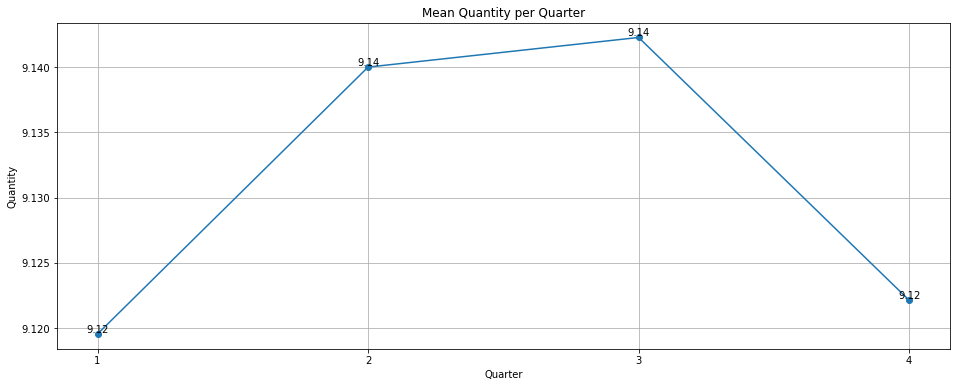

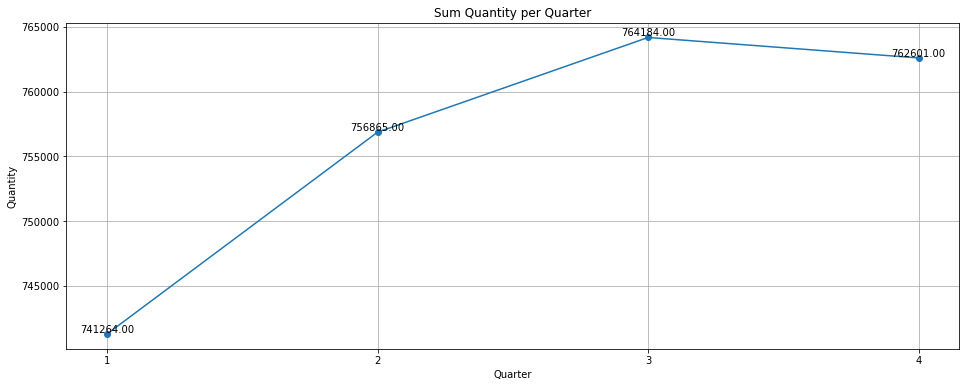

In [21]:
eda_plot(df, 'Quarter', 'Quantity', measurement='mean') # how much products an average customer buys for each quarter
eda_plot(df, 'Quarter', 'Quantity', measurement='sum')  # total engagement for each quarter; how many purchases

#### A) Analysis:
- Customer engagement are indifferent for all quarters.
- On average, a customer purchases 9 products per transaction.
- Retail Hypermarket has slightly lower customer engagement at the first half of the year (Q1 and Q2).

#### B) Evaluation:
There is a discernible trend in total customer engagement across quarters indicating potential distinct market trends for each quarter. Therefore, Quarter is a useful feature for modelling.

#### 2.4.4 Relationship between quantity and quality
- Do customers purchase more when products are cheaper or buy fewer when prices are higher?

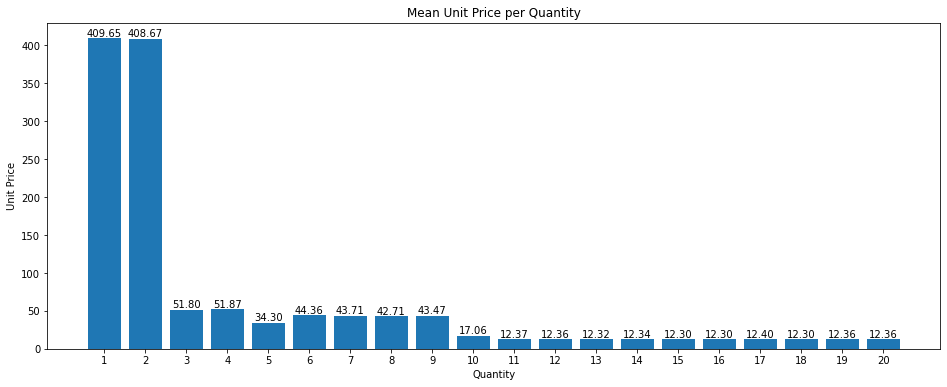

In [22]:
eda_plot(df, 'Quantity', 'Unit_Price', 'bar', measurement='mean') # average customer engage for differently priced products

#### A) Analysis:
1. Each transaction can have a quantity of 1 to 20 of a product.
2. 3 Classes observed:
    - Customers usually only buy 1-2 of an expensive product.
    - Customers buy 3-9 of a mid-range priced product.
    - Customers buy cheap products below 20 dollars in bulks of 10-20.

#### B) Evaluation:
- Discounts isn't the explanation for customers buying more of a product as a discount of 88% (350/400) is illogical. 
- Expensive products have poor customer engagement as customers only buy 1-2 of such products, while cheaper products below 50 dollars have higher engagement as customers buy such products in bulk purchases.

#### C) Conclusion:
- Unit Price is a potential predictor because there is a distinguishable engagement pattern between cheap, mid-range, and expensive products.

#### 2.4.5 Engagement across different product categories

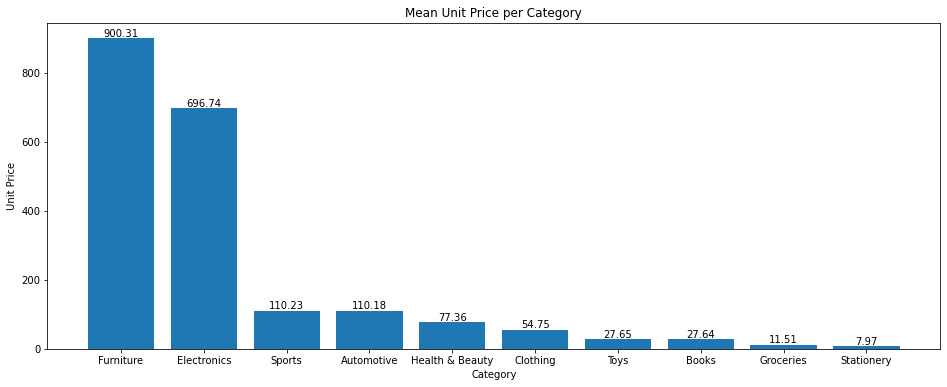

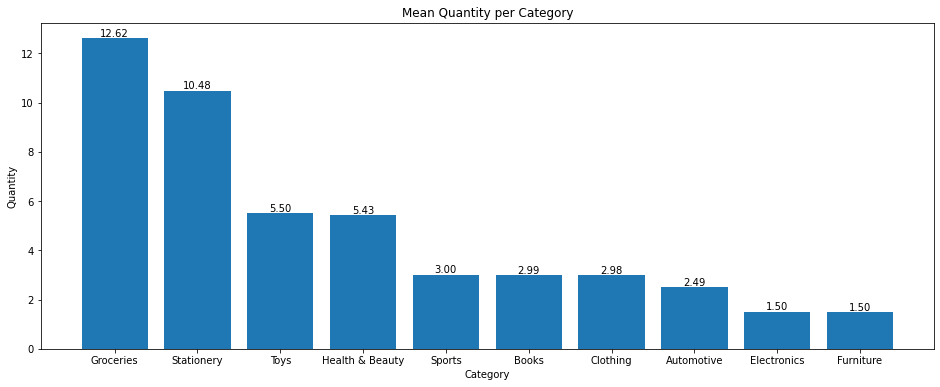

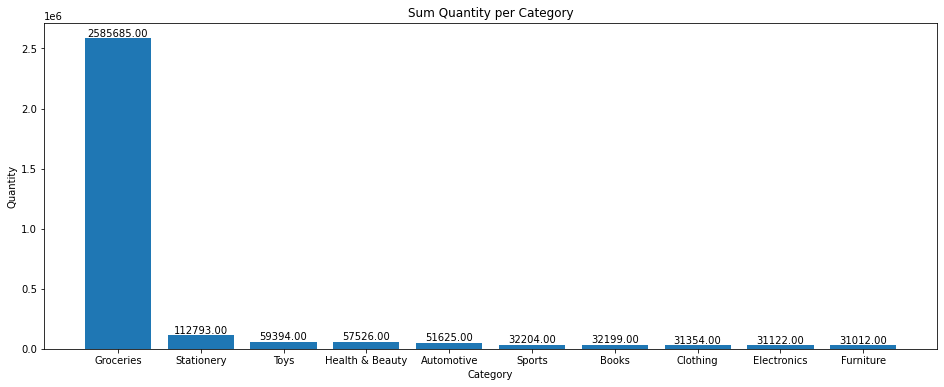

In [23]:
eda_plot(df, 'Category', 'Unit_Price', 'bar', 'mean') # average cost of a product
eda_plot(df, 'Category', 'Quantity', 'bar', 'mean')   # how much an average customer purchases a product from this category
eda_plot(df, 'Category', 'Quantity', 'bar', 'sum')    # total engagement per category

#### Calculating percentage of grocery purchases:

In [24]:
# Sum quantity for all rows where category is groceries
total_groceries = sum(df[df['Category'] == 'Groceries']['Quantity'])

# calculate percentage of purchases that groceries
total_groceries / sum(df['Quantity'])

0.8547962024705495

#### A) Analysis
- 85% of purchases are products under Groceries category.
- Products from expensive categories like Furniture and Stationery have the poorest customer engagement as customers only purchase 1-2 of such products per transaction.
- Products from cheap categories like Groceries and Stationery have high customer engagement as customers purchase 10-13 of these products at a time.

#### B) Evaluation
- Customers treat Retail Hypermarket as a grocery store.


- Pricier products tend to get lesser customer engagement. This could be due to:
    1. Nature of products: customers **do not need multiple furntitures**.
    2. Unaffordability: an **average customer cannot afford to spend 7000 dollars** to buy 10 electronic devices at a time.


- It's worth noting that there may be multicollinearity between the quantity of items purchased and the product category since the engagement patterns compliment each other.

#### C) Conclusion
Category is a useful predictor because there is an observable pattern for customer engagement across different categories.

#### 2.4.6.a Exploring relationship between Category and Product_ID
From 2.4.1, I discovered that the first 4 digits could represent something. To clarify my assumption, I shall investigate through visualisation.

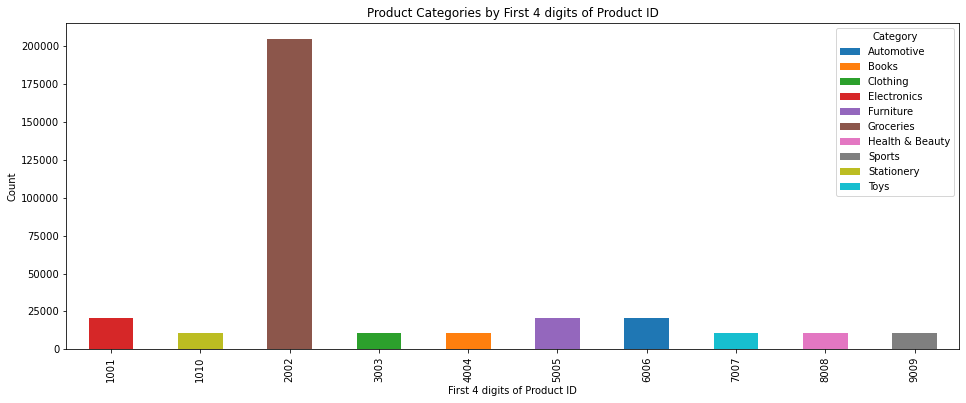

In [25]:
# Extract the first digit from 'Product_ID' and create a new column 'First_Digit'
df['4_digits'] = df['Product_ID'].astype(str).str[0:4]

# Group data by 'First_Digit' and 'Category' and count the occurrences
grouped = df.groupby(['4_digits', 'Category']).size().unstack(fill_value=0)

# Create a bar plot to visualize the relationship
grouped.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title("Product Categories by First 4 digits of Product ID")
plt.xlabel("First 4 digits of Product ID")
plt.ylabel("Count")
plt.show()

In [26]:
df.Product_ID.nunique() # count of distinct values

75725

#### A) Analysis
- First 4 digits of Product ID represents the category.
- Groceries are the most common products sold in Retail Hypermarket.

#### B) Evaluation
- There is no anomalous products that do not belong to a category.
- There are too many product IDs; high cardinality column.

#### 2.4.6.b Could Product Type be within Product_ID?
Since product category could be found within Product_ID, could the Product_ID also tell us what type of product it is?

In [27]:
df['Product_ID'].nunique() # how many product ids are there

75725

In [28]:
# Extract the 5th to 6th digits from the 'Product_ID'
df['Product_Type_1'] = df['Product_ID'].astype(str).str[4:6]

# Extract the 5th to 6th digits from the 'Product_ID'
df['Product_Type_2'] = df['Product_ID'].astype(str).str[6:9]

In [29]:
df['Product_Type_1'].nunique()

100

In [30]:
df['Product_Type_2'].nunique()

100

In [31]:
# How unique variations of products
df['Product_Type_3'] = df['Product_ID'].astype(str).str[4:9]
df['Product_Type_3'].nunique()

10000

#### C) Assumptions
#### 1.
- Product_Type_1 could represent the product type; what the product is.
- Product_Type_2 could represent the brand of the brand.

#### 2. 
Last 4 numbers could just be random variations to identify a product.

#### D) Conclusion
- Do not use Product ID as it could overfit model due to high cardinality.
- **Risky to use Product Types** as its impossible to validate what they represent due to insufficient information. Hence, it could violate the requirements of 'Need to be usable for new products' and it could also potential overfit the model due to high cardinality.

#### 2.4.7 Customer analysis
- I suspect a similar pattern with Customer ID where Retail Hypermarket labels their customer and puts the customer type as the header of the ID. Hence, I investigated each customer class.

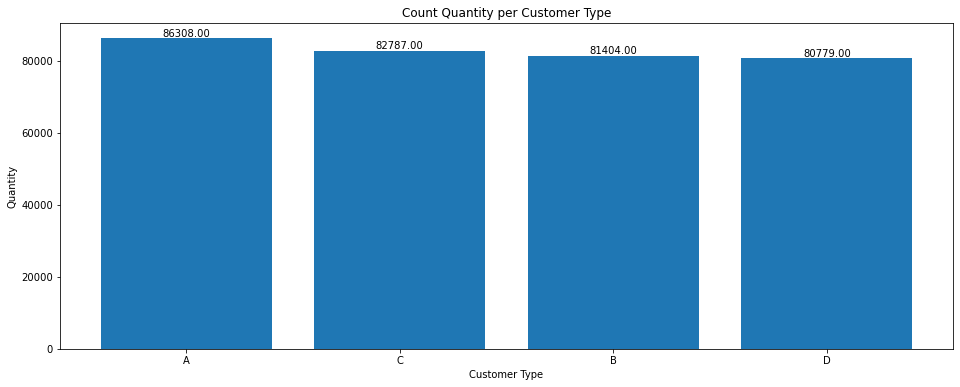

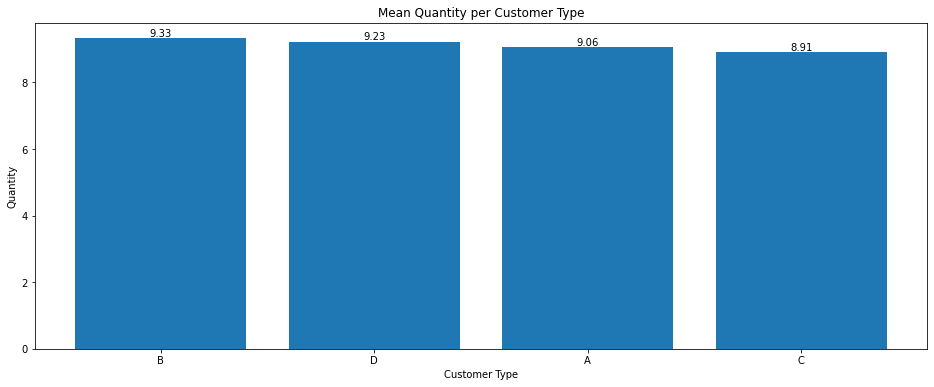

In [32]:
# Extract the first letter from 'Customer_ID' and create a new column 'Customer_Type'
df['Customer_Type'] = df['Customer_ID'].str[0].str.capitalize()

# how many customer per class
eda_plot(df, 'Customer_Type', 'Quantity', 'bar', 'count')

# average amount of products purchase per transaction for each customer type
eda_plot(df, 'Customer_Type', 'Quantity', 'bar', 'mean')

#### A) Analysis
- First letter of Product ID represents the customer class.
- Around 80K customers for each customer type; no class imbalance in customer type.
- All customer class purchase around 9 products per transaction; indifferent.
- Customer type B has most engagement while customer type C has least engagement.

#### B) Conclusion
Customer type is a weak feature as there is minimal variation in customer engagement across customer types.

## 3. Modelling
### 3.0 Reusable Methods

#### 3.0.1 Importing libraries

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error as MAE
from sklearn import tree
import numpy as np

#### 3.0.2 Partitioner
To split dataset into train-test sets

#### Usage:
Provide DataFrame, target column, train size, and whether the predictors should be normalized for interepretability.

In [34]:
def partition(X, y, train_size=0.7, SEED=SEED, normalize=True):
    if normalize:
        scaler = StandardScaler()   # init scaler
        X = scaler.fit_transform(X) 

    # Split the normalized data into train and test sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=SEED) # SEED = 2202934

    return X_train, X_val, y_train, y_val

#### 3.0.3 Model Evaluator
Report on model's fit and how predictors explain prediction.

#### Usage:
Provide the trained model, Predictors DataFrame, Target DataFrame, original Predictors DataFrame (to obtain column names), are you evaluating with model's training dataset? [True/False] default=False, max_depth=[display branches to which level].

In [35]:
def evaluate_model(model, X, y, cols, training=False, max_depth=3):
    y_pred = model.predict(X)  # Predict using the model and predictors
    
    # Only runs for Linear Regression, when intercept_ is found in model
    if hasattr(model, 'intercept_') and training:                                          # ONLY run for training evaluation 
        print(f"Intercept: {model.intercept_:.2f}")                                        # print intercept
        print(pd.DataFrame(model.coef_, cols.columns, columns=["Coefficient"]))            # print col name: value
            
    # for black-box models like DTR
    elif hasattr(model, 'feature_importances_') and training:
        # visualize Tree
        plt.figure(figsize=(16,20))
        tree.plot_tree(model, feature_names=list(X_train.columns), max_depth=max_depth, filled=True, fontsize=10)
            
    elif hasattr(model, 'intercept_') or hasattr(model, 'feature_importances_'):
        pass  # if testing set, no need to report on features
    
    # catch error
    else:
        print("Model type not supported for obtaining coefficients or feature importance.")
    
    
    # Visualize the fit
    plt.figure(figsize=(16, 6))
    plt.scatter(y, y_pred, alpha=0.2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.grid(True)
    plt.show()
    
    print(f"R-squared (Goodness of Fit): {r2_score(y, y_pred):.2f}")

#### 3.0.4 Accuracy Evaluator
Creates relevant assessments to report on a model's performance.

#### Usage:
Provide the trained model, Predictors DataFrame, Target DataFrame, sample size for visualization.

In [36]:
def evaluate_accuracy(model, X, y, sample_size=0):
    y_pred = model.predict(X)  # Predict using the model and predictors
    
    # accuracy of predictions
    mae = MAE(y, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}%")
    
    # Visualize Accuracy
    if sample_size > 0:
        y = y.iloc[:sample_size] # subset y into sample size specified
        y_pred = y_pred[:sample_size]
        
    else:
        return # if no sample size = no need sampling analysis, end the function
    
    print("Sampled Analysis:")
    plt.figure(figsize=(16, 6))
    plt.plot(y.reset_index(drop=True), "red", label='Actual Data')
    plt.plot(y_pred, 'blue', label='Predicted Data', alpha=0.5)
    
    plt.ylabel('Quantity')
    plt.title('Actual Vs Predicted')
    plt.legend()
    plt.show()
    
    # accuracy for subsetted data
    mae = MAE(y, y_pred)
    print(f"MAE for sample: {mae:.2f}")

### 3.1 Data Pre-processing
### 3.1.0 Encoders
Original columns will be dropped after encoding.

#### 1. One-Hot Encoder:

In [37]:
# One-Hot Encoding
def one_hot_encode(df, columns_to_encode):
    one_hot = pd.get_dummies(df[columns_to_encode])         # Create new col for each unique value in encoded column
    df = pd.concat([df, one_hot], axis=1)                   # Concatenate encoded columns with the original DataFrame
    df = df.drop(columns=columns_to_encode)                 # Drop cols after encoded
    
    return df

Input: DataFrame, [encode_col1, encode_col2]

#### 2.a Label Encoder:

In [38]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns_to_encode):
    label_encoders = {}     # Dictionary to store label encoders for each column
    df_encoded = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    for col in columns_to_encode:
        label_encoder = LabelEncoder()                               # Init the LabelEncoder
        encoded_data = label_encoder.fit_transform(df_encoded[col])  # Fit and transform the column
        df_encoded[col + '_encoded'] = encoded_data                  # Add the encoded column to the DataFrame

        label_encoders[col] = label_encoder                          # Store the label in the dictionary
        df_encoded.drop(col, axis=1, inplace=True)                   # Drop the original column

    return df_encoded, label_encoders

Input: DataFrame, [encode_col1, encode_col2]

#### 2.b Label Decoder:

In [39]:
def label_decoder(label_encoders):
    for col, encoder in label_encoders.items():
        print(f"Label values for {col}: {encoder.classes_}") # map out cols and labels

#### 3.1.1 Extract relevant features for Model's DataFrame:

In [40]:
df.head(1)

,Datetime,Product_ID,Category,Quantity,Unit_Price,Customer_ID,Quarter,4_digits,Product_Type_1,Product_Type_2,Product_Type_3,Customer_Type
269220,2022-01-01,20028680,Groceries,15,10.140,c918818917,1,2002,86,80,8680,C


#### Do not use columns:
#### 1. Datetime:
- Target Leakage: future value.
- High cardinality and leads to overfitting.

#### 2. Product_ID:
- Violates business requirement: Model must work for new unseen values.
- High cardinality and leads to overfitting.

#### 3. Customer ID:
- Violates business requirement: Model must work for new unseen values.
- High cardinality and leads to overfitting.

#### 4. First 4 digits of Product_ID:
- Same meaning and value as category, leading to multicollinearity.

In [41]:
# Subset a predictors and Target into DataFrames for modelling
X = df[['Category', 'Unit_Price', 'Customer_Type', 'Quarter']] # predictors
y = df['Quantity']                                             # Target

#### 3.1.2 Encoding predictors
I selected one-hot encoding as its easy to interpret and is the most common encoding method used.

In [42]:
X = one_hot_encode(X, ['Category', 'Customer_Type', 'Quarter'])

In [43]:
X.columns # Check all columns in predictors DataFrame

Index(['Unit_Price', 'Category_Automotive', 'Category_Books',
       'Category_Clothing', 'Category_Electronics', 'Category_Furniture',
       'Category_Groceries', 'Category_Health & Beauty', 'Category_Sports',
       'Category_Stationery', 'Category_Toys', 'Customer_Type_A',
       'Customer_Type_B', 'Customer_Type_C', 'Customer_Type_D', 'Quarter_1',
       'Quarter_2', 'Quarter_3', 'Quarter_4'],
      dtype='object')

#### 3.1.3 Data Partitioning
Splitting dataset into train-test sets where 70% of data is for training and 30% is for validation. Normalization not needed as all features are 0 or 1 except for unit price because their are derived from one-hot encoding. Hence, the model can be interpreted fairly without normalization.

In [44]:
X_train, X_val, y_train, y_val = partition(X, y, train_size=0.7, normalize=False)

### 3.2 Linear Regression (LR)

In [45]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()        # init model
LR_model.fit(X_train, y_train)       # train model

LinearRegression()

#### Evaluate Model explanability on training set:

Intercept: 4.64
                          Coefficient
Unit_Price                      0.001
Category_Automotive            -2.251
Category_Books                 -1.689
Category_Clothing              -1.712
Category_Electronics           -3.841
Category_Furniture             -4.053
Category_Groceries              7.965
Category_Health & Beauty        0.721
Category_Sports                -1.754
Category_Stationery             5.795
Category_Toys                   0.820
Customer_Type_A                -0.001
Customer_Type_B                 0.045
Customer_Type_C                -0.135
Customer_Type_D                 0.091
Quarter_1                      -0.010
Quarter_2                       0.026
Quarter_3                       0.011
Quarter_4                      -0.026


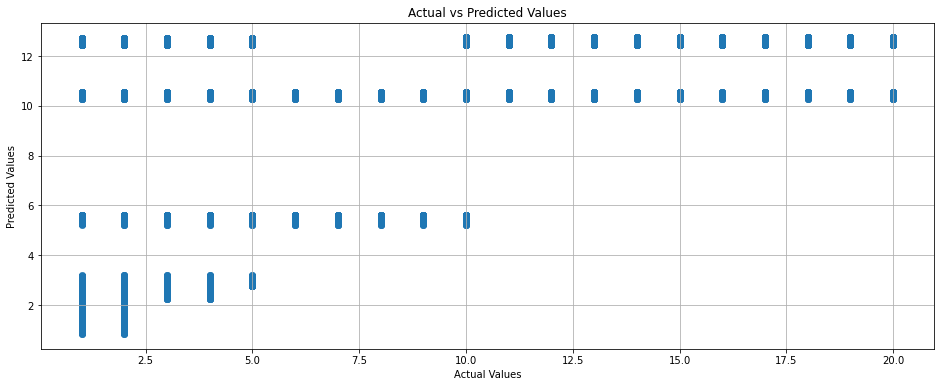

R-squared (Goodness of Fit): 0.51


In [46]:
evaluate_model(LR_model, X_train, y_train, X, training=True) 
# Model, training predictors, training targets, predictors, isTraining

#### Model performance on training set:

In [47]:
evaluate_accuracy(LR_model, X_train, y_train)

Mean Absolute Error (MAE): 3.36%


#### Evaluate Model explanability on validation set:

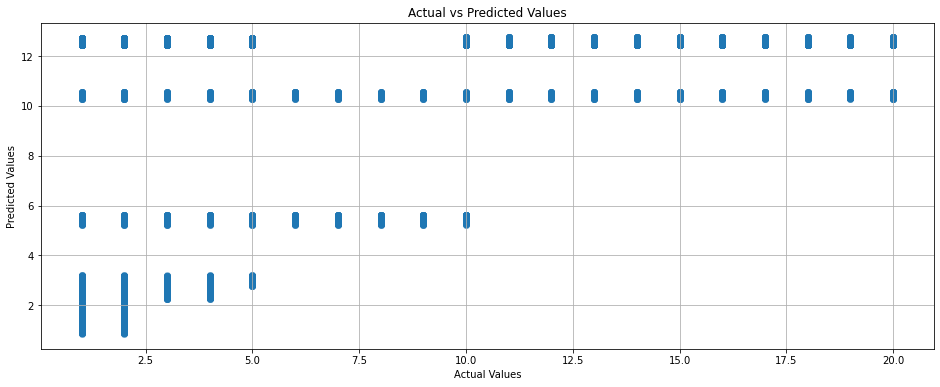

R-squared (Goodness of Fit): 0.51


In [48]:
evaluate_model(LR_model, X_val, y_val, X)

#### Model performance on training set:

Mean Absolute Error (MAE): 3.37%
Sampled Analysis:


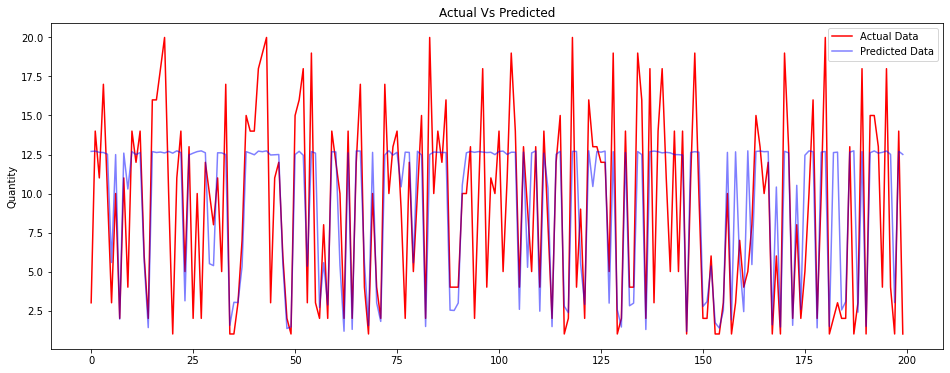

MAE for sample: 3.03%


In [49]:
evaluate_accuracy(LR_model, X_val, y_val, sample_size=200) # edit sample_size to explore

### Analysis:
Model is unable to predict beyond 13 units of Quantity.

### 3.3 Decision Tree Regression (DTR)

In [55]:
#Build DTR model
from sklearn.tree import DecisionTreeRegressor
DTR_model = DecisionTreeRegressor(random_state=SEED).fit(X_train , y_train) # train model

#### Evaluate Model explanability on training set:

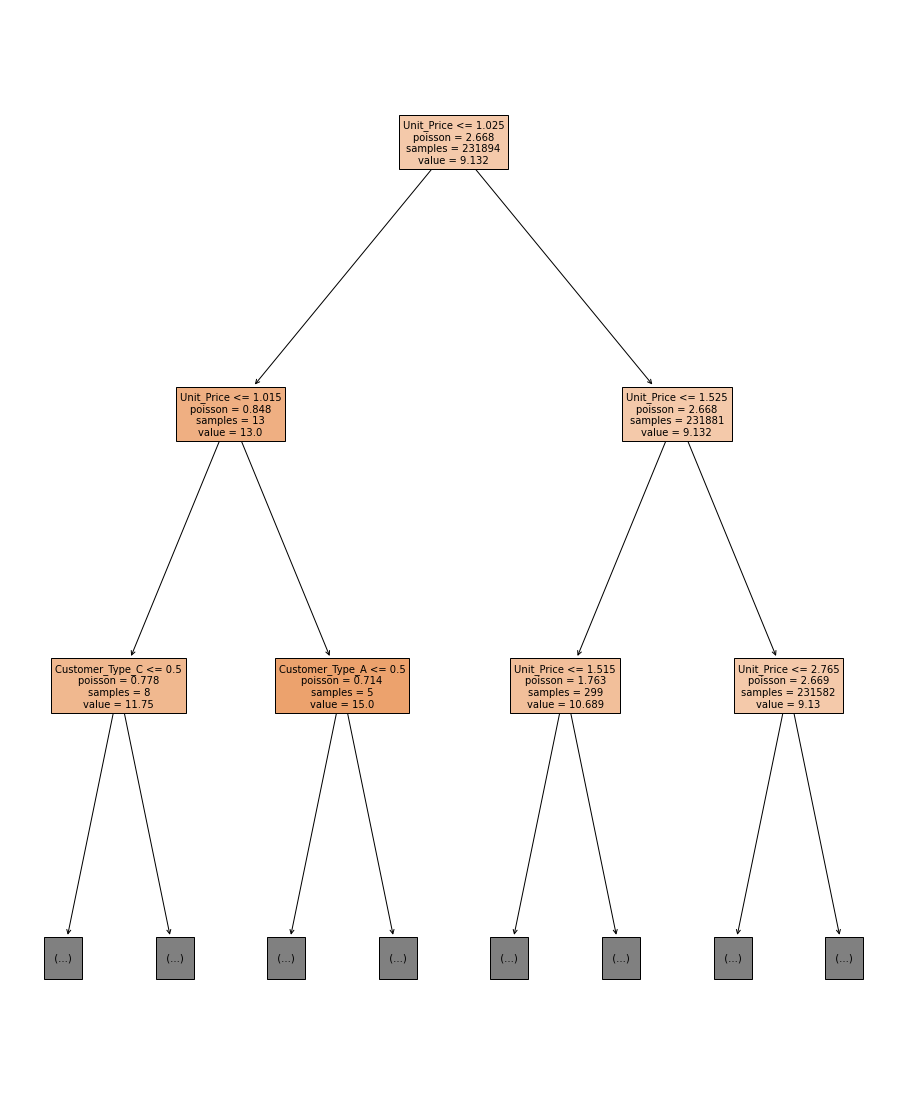

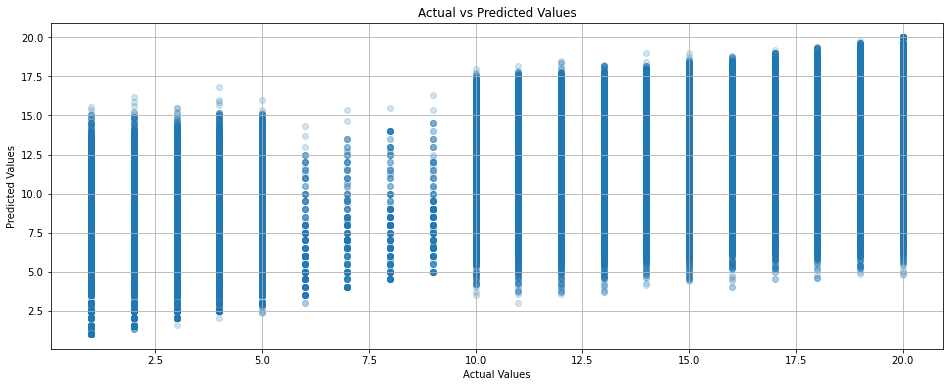

R-squared (Goodness of Fit): 0.69


In [56]:
evaluate_model(DTR_model, X_train, y_train, X, training=True, max_depth=2)

#### Model performance on training set:

In [57]:
evaluate_accuracy(DTR_model, X_train, y_train)

Mean Absolute Error (MAE): 2.36%


#### Evaluate Model explanability on validation set:

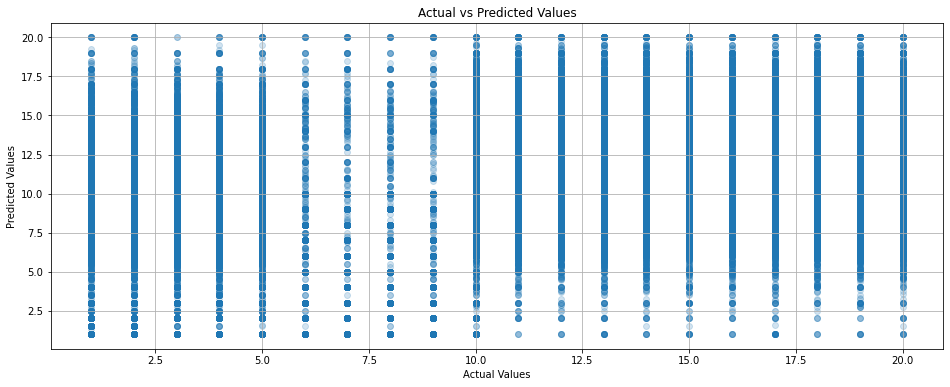

R-squared (Goodness of Fit): 0.46


In [58]:
evaluate_model(DTR_model, X_val, y_val, X)

#### Model performance on training set:

Mean Absolute Error (MAE): 3.60%
Sampled Analysis:


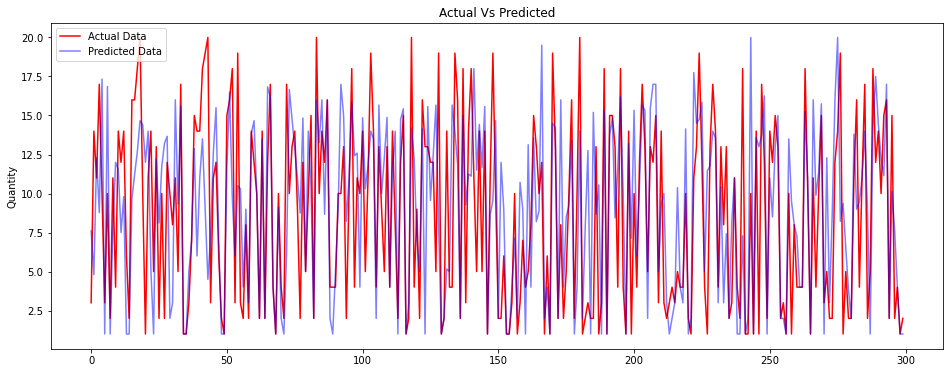

MAE for sample: 3.45%


In [59]:
evaluate_accuracy(DTR_model, X_val, y_val, sample_size=300) # edit sample_size to explore

#### Analysis:
DTR model is likely overfitted due to disparity of the R-Squared and MAE for training and validation.

#### Evaluation of Baseline Models:
- LR is not a suitable model as it is unable to capture the pattern of customer engagement beyond 13 units.
- DTR has overfitting issues that needs to be fixed.
- DTR seems to have potential in understanding customer engagement as the training MAE is 2.36. Improvements should be made to make it lower.
- DTR's R-Squared is below 80%, which makes it unreliable.
- I need to round off prediction to whole value or tune to model to only produce discrete predictions.

### Next Steps for Part 2
Build upon the DTR model by:
- Addressing overfitting issue
- Features Engineering for more meaningful predictors
- Features Selection
- Trying out Ensemble Machine Learning methods like Random Forest
- Selecting best Encoding Method
- Permutation Selection
- Model hyperparameter-tuning/pruning to improve predictive performance

### References:
- 1.0 Problem Framing: Creating Week 03 Workshop 05: Problem Framing. Temasek Polytechnic. 
- 1.6 Metrics for evaluating models. Week 02 Workshop 04: Model Scoring
- 1.8 Considering environmental factors: Ideas were improved upon suggestions from ChatGPT.
- 1.9 Formulating potential Target Leakages, Week 03 Workshop 06: Target Leakage
- 2.1 Data Dictionary is taken from project specifications.
- 2.4.2 EDA Graph Plotter is built with ChatGPT. OpenAI. (2023, October 30). Re: Python Code for Creating Line and Bar Plots in EDA [Online Forum Comment]. ChatGPT by OpenAI. https://www.chatgpt.com
- 2.4.6 Graph of Total Revenue per Product is adapted from ChatGPT's code. OpenAI. (2023, October 30). Re: Python Code for Creating Line and Bar Plots in EDA [Online Forum Comment]. ChatGPT by OpenAI. https://www.chatgpt.com
- 3.0 Reusable methods are built with ChatGPT. OpenAI. (2023, October 31).
- 3.0.3 Coefficient of predictors table adapted from P01_RecapML 4.4 Model Interpretation#Coefficients. Temasek Polytechnic.
- 3.0.4 Sampled analysis graph is adapted from P01_RecapML 4.4 Model Interpretation#Plot of y_pred and y_test. Temasek Polytechnic.
- 3.1.0 One-Hot encoder built with ChatGPT. OpenAI. (2023, October 31). Re: # One-Hot Encoding
def one-hot(): // create a one-hot encoder function. input: df, columns to be encoder [Online Forum Comment]. ChatGPT by OpenAI. https://www.chatgpt.com
- 3.1.0 Label encoder and decoder built using One-Hot encoder and Lab P01_RecapML#3. Data Preparation
- 3.3 Code to visualize Decision Tree Regressor is taken from Lab P02_TreeBasedAlgorithm#2.4 Limitations of DT#Method 2 

Guide for Data Modelling:
- Ameisen, E. (2018, March 6). Always start with a stupid model, no exceptions. Medium. https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa 
- Nair, A. (2022, April 9). Baseline Models: Your Guide For Model Building - Towards Data Science. Medium. https://towardsdatascience.com/baseline-models-your-guide-for-model-building-1ec3aa244b8d 

### End of Part 1